In [1]:
import pandas as pd
import numpy as np


In [2]:

df = pd.read_csv("spam.csv", encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
df.sample()

,v1,v2
4502,ham,Stupid.its not possible


In [6]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.head()
#spam=1 and not spam=0


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(5169, 2)

In [13]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1ec40da6f00>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')])

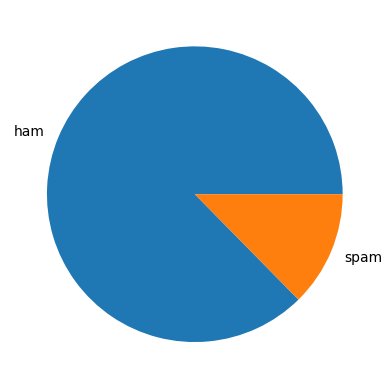

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'])


In [15]:
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jonty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['num_characters']=df['text'].apply(len)

In [18]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [19]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [20]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head(8)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2


In [22]:
#it describes the charecters of a spam message, characters such as num_char,num_words,num_sent
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [23]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
df_corr=df[['target','num_characters','num_words','num_sentences']]

In [25]:
df_corr

,target,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,161,35,4
5568,0,37,9,1
5569,0,57,15,2
5570,0,125,27,1


In [26]:
df_corr.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


In [27]:
import seaborn as sns

<Axes: >

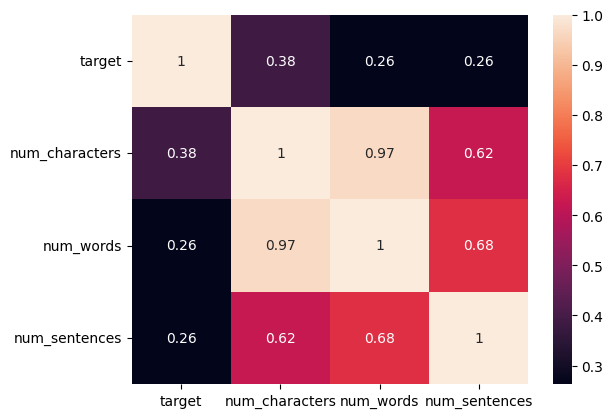

In [28]:
sns.heatmap(df_corr.corr(),annot=True)

In [31]:
##DATA PROCESSING##

In [32]:
def func(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    return text


In [34]:
func("HIII HOW ARE youreO")

['hiii', 'how', 'are', 'youreo']

In [39]:
def func(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    #for special charecters and punctions
    y=[]
    for i in text:
       if(i.isalnum()):
           y.append(i) 
    
    return y


In [40]:
func("HIII HOW ARE youre %$@*")

['hiii', 'how', 'are', 'youre']

In [42]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("LOVING")

'love'

In [63]:
def func(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if(i.isalnum()):
            y.append(i)
    z=[]
    for i in y:
        if(i not in stopwords.words("english") and (i not in string.punctuation)):
            z.append(ps.stem(i))

    return z

In [64]:
func("HOW ARe you loving shantanu? fine i hope!!#@ishan")

['love', 'shantanu', 'fine', 'hope', 'ishan']

In [68]:
df['Transformed']=df['text'].apply(func)
df.head(5)

,target,text,num_characters,num_words,num_sentences,Transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [73]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

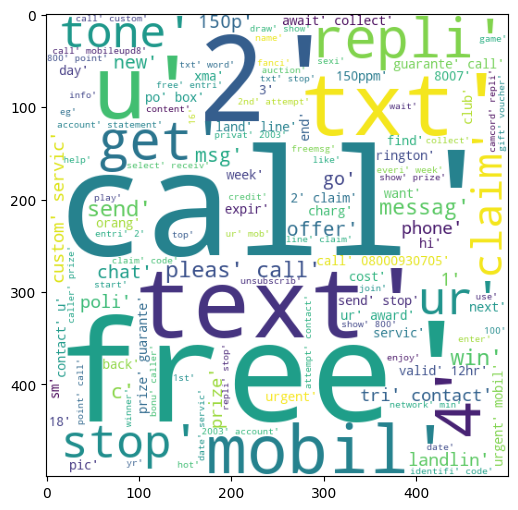

In [78]:
df['Transformed'] = df['Transformed'].astype(str)

spam_wc = wc.generate(df[df['target'] == 1]['Transformed'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


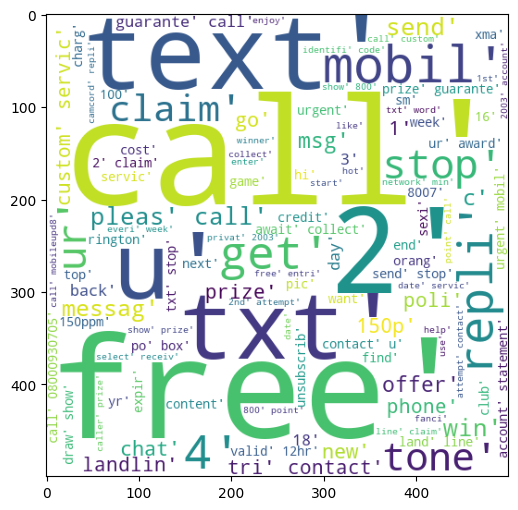

In [81]:
ham_wc = wc.generate(df[df['target'] == 1]['Transformed'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


In [84]:

spam_corpus = []
for msg in df[df['target'] == 1]['Transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,"'call',",305
1,"'free',",158
2,"'2',",154
3,"'txt',",137
4,"'text',",118
5,"'mobil',",106
6,"'u',",99
7,"'repli',",99
8,"'ur',",99
9,"'claim',",96


In [85]:

ham_corpus = []
for msg in df[df['target'] == 0]['Transformed'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,"'u',",717
1,"'go',",353
2,"'get',",295
3,"'lt',",271
4,"'2',",270
5,"'gt',",242
6,"'come',",205
7,"'like',",196
8,"'got',",186
9,"'ur',",185


In [86]:
df

,target,text,num_characters,num_words,num_sentences,Transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point', 'crazi', 'avail', 'b..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar', 'joke', 'wif', 'u', 'oni']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entri', '2', 'wkli', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', 'think', 'goe', 'usf', 'live', 'around..."
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,"['2nd', 'time', 'tri', '2', 'contact', 'u', 'p..."
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,"['b', 'go', 'esplanad', 'fr', 'home']"
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,"['piti', 'mood', 'suggest']"
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,"['guy', 'bitch', 'act', 'like', 'interest', 'b..."


In [91]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['Transformed']).toarray()
X
y=df['target'].values

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [94]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [97]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [98]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [99]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187
